In [4]:
import torch
from fastai.vision.all import *
torch.cuda.get_device_name(0)   
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Lets download pictures of dogs and cats from a source provided by FastAI.

This will be stored in a variable `path`, which will contain the absolute paths to these images

In [5]:
path = untar_data(URLs.PETS)/'images'

We can print these paths with `ls()`, a method provided by fastAI similar to that seen in the OS.

The result is a fastAI list, `L`.

In [6]:
path.ls() 

(#7390) [Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg')...]

In this dataset, all the images are in a single folder `images`, but we can distinguish between images of dogs and cats, as the filenames of cat images are capitalised.

Thus we can define:

In [7]:
 def is_cat(x): return x[0].isupper()

Lets extract these photos into a variable.

We can sort them for good measure, to ensure we always get the same order.

In [8]:
dogsAndCats = (path).ls().sorted()
dogsAndCats

(#7390) [Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),Path('C:/Users/logan/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg')...]

Lets display an image

C:\Users\logan\.fastai\data\oxford-iiit-pet\images\Abyssinian_1.jpg


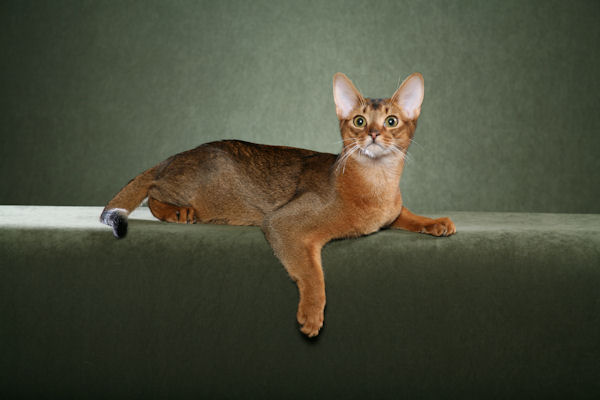

In [9]:
image1 = dogsAndCats[0]
print(image1) # Display image directory

cat1 = Image.open(image1)
cat1

Lets open these images and store them in a tensor.

We will need to resize each image so they are uniform, we could pick any size,but we will go with 192x192

For further conformity, we will also need to ensure all our images are `rgb`, so we can use a convienent function `convert` for that.

If you get an error here - There is a problem with the dataset including `.mat` images. You can remove these.

In [10]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((192, 192)),
    transforms.ToTensor()
])

# Load and convert all images to RGB mode
image_tensor = [transform(Image.open(o).convert('RGB')) for o in dogsAndCats]

We can also now look at the length of this tensor

In [11]:
len(image_tensor)

7390

Lets now quickly check our images are doing alright:

<Axes: >

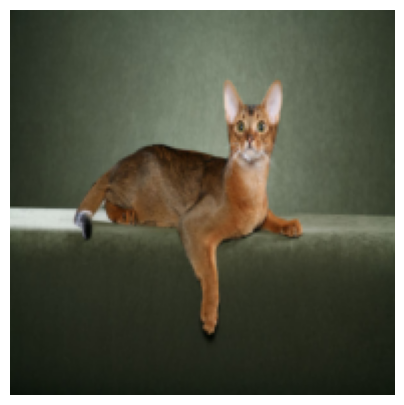

In [12]:
show_image(image_tensor[0])

We need to convert these images into a single, Four-dimensional tensor.

PyTorch can do this for us with `stack`, but we need to cast the image pixel values to floats, as currently they are integers.

A pixel can be between the values 0 to 255, but PyTorch is expecting numbers between 0 and 1.

We'll just divide each pixel by 255 to get a nice number between 0 and 1.

In [13]:
stacked_images = torch.stack(image_tensor).float() / 255

Now we have all our images stacked into a single, 4D tensor.

We can see the shape of this tensor with the following:

In [14]:
 stacked_images.shape

torch.Size([7390, 3, 192, 192])

7390 images across 3 channels (r,g,b) with size 192x192

Lets make this into our x-axis and convert this tensor into a 2D tensor.


In [15]:
train_x = stacked_images.view(7390,-1)
train_x.shape

torch.Size([7390, 110592])

As a result we have a 2D vector of 7390 images.

Each image is 192x192 pixels, across 3 channels, thus each image is $(192x192)x3$ pixels.

Thus the shape is [7390,110592]

Next we need to define the Y labels:

Earlier we defined a function `is_cat` which determines whether an image is a cat by looking at the filename.
- If it is capitalised, it is a cat.
- If it is not capitalised, it is a dog.

Thus was can define our labels train_y based on this logic.


In [19]:
labels = []

for file_path in dogsAndCats:
    filename = file_path.name
    label = 0 if is_cat(filename[0]) else 1 # is_cat was defined earlier
    labels.append(label)

train_y = torch.tensor(labels).unsqueeze(1)
train_y.shape

torch.Size([7390, 1])

Our result is a 2D tensor, length 7390, with each item being just a single digit.

We can now zip these together into a single dataset.    

In [22]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([110592]), tensor([0]))

We can take the first tuple from our dataset, and unpack it into `x` and `y`.

We can see the shape of `x` and see a tensor of 110592 numbers.

We can display the value of `y` to conclude whether it is a cat, in this case, the value is 0, and thus we can conclude it is a cat.

We now have a nice, labelled dataset to use.